# Minimum Spanning Tree (MST)

**NOTA**: Para esta tarea, es posible utilizar las funciones de la tarea anterior para definir y graficar un grafo.

## 0.- Para el ejercicio 1, construye y visualiza el siguiente **grafo G** con el modulo de **graphviz**

**texto en negrita**<img src="MST.png" width="50%" height="50%">

In [1]:
# Necesitas instalar graphviz para correr este notebook!

from graphviz import Graph, Digraph
from IPython.display import display

# Usa esta función para dibujar un grafo no dirigido
def plotear_grafica(G, color = {}):
        grafica = Graph(graph_attr = {'size':'4'})
        for vertice in G:
            if not vertice in color or color[vertice] == 'white':
                grafica.node(vertice)
            else:
                if color[vertice] == 'black':
                    grafica.node(vertice, 
                                 style = 'filled', 
                                 color = color[vertice], 
                                 fontcolor = 'white')
                else:
                    grafica.node(vertice, 
                                 style = 'filled', 
                                 color = color[vertice])
        for n1 in G:
            for n2 in G[n1]:
                if n1 < n2:
                    grafica.edge(n1, n2)
        display(grafica)

# Usa esta para dibujar un grafo dirigido (Árboles para esta tarea)
def plotear_graficad(p):
        grafica = Digraph(graph_attr = {'size':'3'})
        for v1 in p:
            if p[v1] != None:
                for v2 in p[v1]:
                    grafica.edge(v2, v1)
        display(grafica)

In [2]:
def make_link(G, v1, v2):
    if v1 not in G:
        G[v1] = {}
    (G[v1])[v2] = 1
    if v2 not in G:
        G[v2] = {}
    (G[v2])[v1] = 1
    return G

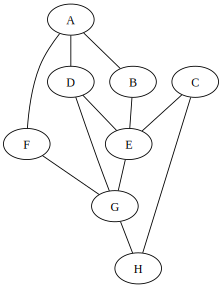

In [3]:
aristas = [('A', 'B'), ('A', 'D'), ('A', 'F'), ('D', 'E'), ('D', 'G'), ('F', 'G'), ('E', 'B'), ('E', 'G'), ('E', 'C'), ('G', 'H'), ('C', 'H')]

GX = {'A':{}}
for v1, v2 in aristas:
    make_link(GX, v1, v2)

plotear_grafica(GX, {})

## 1.- (10pts) Implementar el algoritmo Kruskal. Encuentra y visualiza el MST del grafo G.

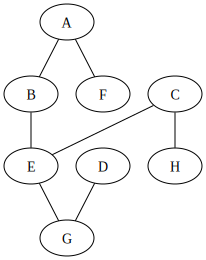

In [4]:
def comp(a):
    return a[1]

def Kruskal(G, pesos):

    MST = {'A':{}}
    Sets = {}

    for v in G:
      Sets[v] = v

    aristas = []

    for a in pesos:
      aristas.append((a,pesos[a]))

    aristas.sort(key = comp)

    for a in aristas:
      x = a[0][0]
      y = a[0][1]
      while Sets[x] is not x:
        x = Sets[x]
      while Sets[y] is not y:
        y = Sets[y]

      if x is not y:
        make_link(MST, a[0][0], a[0][1])
        Sets[x] = y

    return MST

pesos = {('A', 'D'): 5, ('A', 'F'): 2, ('A', 'B'): 1, ('F', 'G'): 4, ('D', 'G'): 2, ('D', 'E'): 3, ('E', 'B'): 2, ('G', 'E'): 2, ('G', 'H'): 5, ('C', 'E'): 4, ('C', 'H'): 1}

MST = Kruskal(GX, pesos)

plotear_grafica(MST, {})



## 2.- (10pts) Agrupamiento con espacio maximo

Dada una coleccion de objetos, el problema de **agrupamiento-k** consiste en dividir dichos objetos en k grupos, tal que, objetos que pertenecen al mismo grupo esten "cercanos", y objetos de diferentes grupos esten "lejanos". Para lograr este agrupamiento, es posible definir una funcion de distancia o similitud entre los objetos, con la idea de que objetos a una distancia grande son objectos poco similares.


Definimos el **espacio** de un agrupamiento-k, como la distancia minimia entre cualquier par de puntos que pertenecen a diferente grupo. Un agrupamiento con espacio maximo consiste en encontrar el agrupamiento-k, tal que el distancia minima entre objetos de diferentes grupos es maxima.

<img src="AEM.png" width="80%" height="80%">

**Pregunta**: Describe como se relaciona el problema de MST y el problema de agrupamiento con espacio maximo?


Si partimos un grafo en subconjuntos y encontramos un MST, las aristas que vayan de un subconjunto a otro y que estén en el MST nos dan información de la distancia mínima entre estos dos conjuntos. Esto es porque si hubiera una arista de menor peso que no esté en el MST y que vaya de un conjunto a otro, podemos sustituir una de las aristas y generar un árbol aún menor que el MST, lo cual es una contradicción.

Esto nos puede ayudar a resolver el problema de agrupamiento con espacio máximo. En particular en el caso k=2, buscaremos la arista más pesada de un MST, de forma que al borrarla, nos separa el grafo en dos subconjuntos que distan uno del otro dicha distancia. Éste será el agrupamiento solicitado porque cualquier división del grafo en dos subconjuntos tiene al menos una arista del árbol que los conecta (y por lo tanto la distancia entre los subconjuntos es menor o igual al peso de la arista encontrada).




**Implementacion**: Dado el conjuto de puntos del archivo X.txt, utiliza una de tus implementaciones para MST y resuelve le problema de **agrupamiento con espacio maximo**, con $k=2$

**Como funcion de distancia utiliza la distancia euclidiana.**

In [5]:
import math

def DFS(G, vertice, color, tono):
    # Escribe tú código aquí.

    if color[vertice] == tono:
      return 

    for v in G[vertice]:
      if G[vertice][v] == 1 and color[v] == 'white':
        color[v] = 'gray'
        DFS(G, v, color, tono)

    color[vertice] = tono


def AgrupamientoEspacioMaximo(G, pesos):

  MST = Kruskal(G, pesos)

  # A continuación se encuentra la arista del MST con mayor peso,
  # se pudo modificar el algoritmo de Kruskal para que regrese esta información pero no se hizo
  # para que dicho algoritmo no esté construido para la resolución de este problema particular

  max = 0

  for v in MST:
    for u in MST[v]:
      if MST[v][u] == 1:
        a = (v,u)
        if a not in pesos:
          a = (u,v)
        if max == 0:
          max = a
        elif pesos[a] > pesos[max]:
          max = a

  # Borramos la arista del MST con mayor peso y coloreamos los conjuntos que quedan,
  # resolviendo el problema   
  MST[max[0]].pop(max[1])
  MST[max[1]].pop(max[0])

  colors = {}
  for v in MST:
    colors[v] = 'white'

  DFS(MST, max[0], colors, 'red')
  DFS(MST, max[1], colors, 'blue')

  return colors


def dist(a,b):
    return math.sqrt((float(a[0]) - float(b[0]))**2 + (float(a[1]) - float(b[1]))**2)


f = open("X.txt", 'r')

lines = f.readlines()

n = len(lines)

puntos = []

for i in range(n):
  l = lines[i].split(" ")
  puntos.append((float(l[0]), float(l[1])))

pesos = {}

for i in range(n-1):
  for j in range(i+1,n):
    pesos[(puntos[i], puntos[j])] = dist(puntos[i], puntos[j])

aristas = []

for i in range(n-1):
  for j in range(i+1,n):
    aristas.append((puntos[i], puntos[j]))


Grafo = {puntos[0]:{}}
for v1, v2 in aristas:
    make_link(Grafo, v1, v2)


colors = AgrupamientoEspacioMaximo(Grafo, pesos)




Finalmente, visualiza el conjunto de puntos, dando un color diferente a cada grupo

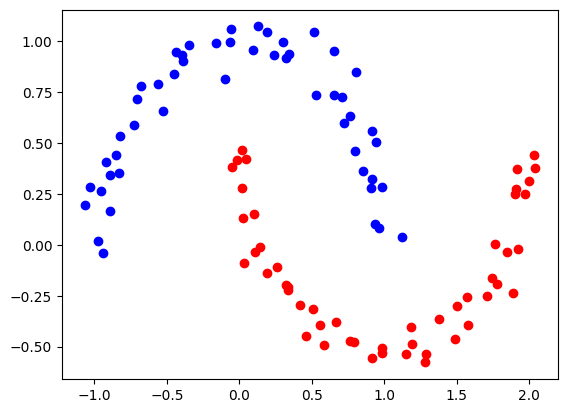

In [6]:
import matplotlib.pyplot as plt

xr = []
xb = []
yr = []
yb = []

for i in range(n):
  if colors[puntos[i]] == 'red':
    xr.append(puntos[i][0])
    yr.append(puntos[i][1])
  else: 
    xb.append(puntos[i][0])
    yb.append(puntos[i][1])

plt.scatter(xr,yr,c = 'red')
plt.scatter(xb,yb,c = 'blue')
plt.show()